## **Machine Learning with Python: An Introduction**

##### **Lessons**
1. Lesson 1: **Python Ecosystem for Machine Learning**
2. Lesson 2: **Python and SciPy**
3. Lesson 3: **Load Datasets from CSV**
4. Lesson 4: **Analyze Data**
    * Understand Data with Descriptive Statistics
    * Understand Data with Visualization
5. Lesson 5: **Prepare Data**
    * Pre-Process Data
    * Feature Selection
6. Lesson 6: **Evaluate Algorithms**
    * Resampling Methods
    * Algorithm Evaluation Metrics
    * Spot-Check Classification Algorithms
    * Spot-Check Regression Algorithms
    * Model Selection
    * Pipelines
7. Lesson 7: **Improve Results**
    * Ensemble Methods
    * Algorithm Parameter Tuning
8. Lesson 8: **Present Results**
    * Model Finalization

### **Lesson 1: Python Ecosystem for Machine Learning**
**1.1 Python:** Python is a dynamic language, widely used for machine learning and data science because of the excellent library
support. Both useful for research and development and production of systems.

**1.2 SciPy:** SciPy is an ecosystem of Python libraries for mathematics, science and engineering. The ecosystem is comprised of:
* `NumPy:` to efficiently work with data in arrays.
* `Matplotlib:` to create 2D charts and plots from data.
* `Pandas:` to load, organize and analyze the data.

**1.3 Scikit-Learn** It is build upon and requires the SciPy ecosystem. The focus of the scikit-learn library is machine learning algorithms for classification, regression, clustering and so on. It also provides tools for related tasks such as - evaluating models, tuning parameters and pre-processing data.

**1.4 Installing the Ecosystem** [For Windows]
* Python: Download python exe file for your windows (update version is better), install it on your machine, add the path in enviromnet variable.
* SciPy: `pip install scipy`
* Numpy: `pip install numpy`
* Matplotlib: `pip install matplotlib`
* Pandas: `pip install pandas`

Once installed, we can confirm that the installation was successful. To check the installation - open any python code editor and run the following codes:

In [1]:
# Check whether they are installed and version
import sys
print(f"Python      : {sys.version}")

import scipy
print(f"Scipy       : {scipy.__version__}")

import numpy
print(f"Numpy       : {numpy.__version__}")

import matplotlib
print(f"Matplotlib  : {matplotlib.__version__}")

import pandas
print(f"Pandas      : {pandas.__version__}")

import sklearn
print(f"Scikit-Learn: {sklearn.__version__}")

Python      : 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
Scipy       : 1.14.0
Numpy       : 1.26.4
Matplotlib  : 3.9.0
Pandas      : 2.2.2
Scikit-Learn: 1.5.1


### **Lesson 2: Python and SciPy**
This section is basically for Python and SciPy Libraries (Numpy, Matplotlib, Pandas) crash course. We assume that we know the basics of -
* Coding in Python
* Numpy basics - numpy structure and operations
* Matplotlib basics - plotting using pyplot
* Pandas basics - load, manipulate of dataframe

### **Lesson 3: Load Datasets from CSV**
The most common format for machine learning data is `csv (comma separated values)` file. Before loading csv data we have to consider some parameters of csv file.
1. **`File Header:`** If the data have a file header it can help assigning names automatically to each column of data. But if not, we need to name the attributes manually.
2. **`Comments:`** Comments in a csv file are indicated by a hash (#) at the start of a line. If comments exist in data, we may need to indicate whether or not to expect comments and the character that indicates the comment line.
3. **`Delimiter:`** In csv file the common seperator is the comma (,). In some cases the data file may use a different delimiter like- tab or white-space in which we must specify the separator explicitely.
4. **`Quotes:`** Sometimes the field values may contain spaces and they will be quated using double quotation (""), the default quote character. Other characters may be used, and we must specify them in the file.

**Pima Indians Dataset**

To demonstrate data loading here we will use the 'Pima Indians' dataset. The dataset is good for demonstration because all the attributes are numeric and the output variable is binary (0 or 1), hence it is a classification problem. The dataset is available in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes).

#### **3.1 Load CSV file with Python Standard Library**

It uses an object that can iterate over each row of the dataset and then convert them into numpy array which makes a dataset of numpy array type.

In [6]:
# Load CSV file (using Python Standard Library)
import csv
import numpy as np
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
with open(filepath, 'r') as raw_data:
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
    header = next(reader)  # Skip the header row
    x = list(reader)

data = np.array(x).astype(float)
print(data.shape)

(768, 9)


#### **3.2 Load CSV file with Numpy**

Numpy uses 'numpy.loadtxt()' function that assumes no header row and all the data has the same format. It can also load dataset directly from the url.

In [7]:
# Load CSV using Numpy
import numpy as np
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
raw_data = open(filepath, 'rb')
#data = np.loadtxt(raw_data, delimiter=',')
data = np.genfromtxt(filepath, delimiter=',', skip_header=1)    # If there is headers
print(data.shape)

(768, 9)


In [ ]:
# Load CSV from URL using NumPy
import numpy as np
from urllib import urlopen
url = 'https://goo.gl/vhm1eU'   # Url of pima_indians_diabetes dataset
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)


#### **3.3 Load CSV File with Pandas**
Pandas uses the 'pandas.read_csv()' function to load the dataset which is very flexible and the most recommended approach for loading machine learning data. The function returns a Dataframe which is helpful in summarizing and plotting data. This can also load data directly fron url.

In [9]:
# Load local csv Data using Pandas
import pandas as pd
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
print(data.shape)

(768, 9)


In [ ]:
# Load csv Data using Pandas from URL
import pandas as pd
url = 'https://goo.gl/vhm1eU/'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']    # Explicitely specify the column names
data = pd.read_csv(url, names=names)
print(data.shape)

### **Lesson 4: Analyze Data**

#### **4.1 Undestand Data with Descriptive Statistics**
To get the best result we have to understand the data. To better understand the machine learning data, we will follow 7 recipes and through our journey of understanding data, we will use the 'Pima Indians Diabetes' dataset.

##### **4.1.1. Take a Peek at Raw Data**

Looking at the raw data can reveal insights of the data and grow ideas on how to better pre-process and handle the data for our machine learning tasks.

In [17]:
# Take a Look at Data
import pandas as pd
pd.set_option('display.width', 200)

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
print(data.head())      # Displays the first 5 items by default, we can also specify the item number - 'data.head(10)'
print(data.tail())      # Displays the last 5 items by default

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180  32.9                     0.171   63        0
764            2      122             70             27        0  36.8                     0.340   27        0
765          

##### **4.1.2. Dimensions of the Data**

Dimension means how many rows and columns are there in the dataset. It is important to know the dimension of the data because by this we can realize two things:
* Too many rows may take too long to train the algorithms and too few rows perhaps we do not have enough data to train the algorithms.
* Too many features (columns) and few instances (rows) can suffer poor performance due to the curse of dimensionality.

[NB] The 'Pima Indinas Diabetes' dataset has 768 rows and 9 columns. The `shape` property results in rows then columns (rows, columns).

In [18]:
# Shape of the Data
import pandas as pd
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
print(data.shape)

(768, 9)


##### **4.1.3. Data Type of Each Attribute**

Knowing data type of each attribute is necessary because to train the algorithms on data we need the data in integer or floating point values. So, Strings, Categorical or Ordinal values need to be converted into floating point or integer value. We can get an idea while taking a look at data but we also can explicitely check the data type of the attributes.

In [19]:
# Types of the Data
import pandas as pd
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


##### **4.1.4. Descriptive Statistics**

Descriptive statistics gives a great insights like - 'Total Instances', 'Are there any missing values', 'Central Tendency', 'Range', 'Dispersion' of data of each attribute. The pandas `describe()` function lists 8 statistical properties of each attribute:
* `Count`: Total number of instances
* `Mean`: Average value of instances
* `Standard Deviation`: 
* `Minimum Value`: Lowest value among instances
* `25th Percentile`: 
* `50th Percentile (Median)`: Middle value among instances
* `75th Percentile`: 
* `Maximum Value`: Highest value among instances

In [11]:
# Types of the Data
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.precision', 2)

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
print(data.describe())

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction     Age  Outcome
count       768.00   768.00         768.00         768.00   768.00  768.00                    768.00  768.00   768.00
mean          3.85   120.89          69.11          20.54    79.80   31.99                      0.47   33.24     0.35
std           3.37    31.97          19.36          15.95   115.24    7.88                      0.33   11.76     0.48
min           0.00     0.00           0.00           0.00     0.00    0.00                      0.08   21.00     0.00
25%           1.00    99.00          62.00           0.00     0.00   27.30                      0.24   24.00     0.00
50%           3.00   117.00          72.00          23.00    30.50   32.00                      0.37   29.00     0.00
75%           6.00   140.25          80.00          32.00   127.25   36.60                      0.63   41.00     1.00
max          17.00   199.00         122.00          99.0

##### **4.1.5. Class Distribution (for Classification only)**

Class distribution means - how many instances are in each class. On classification problem we need to know how balanced the class distribution is. Highly imbalanced dataset is common and may need special handling in data pre-processing. 'Pima Indians Diabetes' dataset is a binary classification problem having 500 instances in class 0 and 268 instances in class 1. (0 = No Diabetes, 1 = Diabetes)

In [23]:
# Types of the Data
import pandas as pd
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
class_counts = data.groupby('Outcome').size()
print(class_counts)

Outcome
0    500
1    268
dtype: int64


##### **4.1.6. Correlation Between Attributes**

Correlation refers to the relationship between two attributes and how they may or may not change together. Pearson's Correlation Coefficient, the most comonly used method, describes correlation between two attributes by -1 or 1 means a full negetive or positive correlation respectively and 0 shows no correlation at all. `Highly correlated attributes can cause poor performance in linear or logistic regression.`

The pandas 'corr()' function lists all attributes across the top and down and give correlation coefficient between all pairs of attributes. The diagonal line through the matrix shows perfect correlation of each attribute with itself.

In [7]:
# Types of the Data
import pandas as pd
pd.set_option('display.width', 250)
pd.set_option('display.precision', 2)

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
correlations = data.corr(method='pearson')
print(correlations)

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome
Pregnancies                      1.00     0.13           0.14          -0.08    -0.07  0.02                     -0.03  0.54     0.22
Glucose                          0.13     1.00           0.15           0.06     0.33  0.22                      0.14  0.26     0.47
BloodPressure                    0.14     0.15           1.00           0.21     0.09  0.28                      0.04  0.24     0.07
SkinThickness                   -0.08     0.06           0.21           1.00     0.44  0.39                      0.18 -0.11     0.07
Insulin                         -0.07     0.33           0.09           0.44     1.00  0.20                      0.19 -0.04     0.13
BMI                              0.02     0.22           0.28           0.39     0.20  1.00                      0.14  0.04     0.29
DiabetesPedigreeFunction        -0.03     0.14           0.04        

##### **4.1.7. Skew of Univariate Distribution**

Many Machine Learning algorithms assume that the data has a `Gaussion` distribution, because it is preferred for better result. Skew refers to a distribution, which is assumed Gaussian (Normal or Bell Curve), that is shifted or squashed in one direction or another. Knowing that an attribute has a skew allow us to perform data preparation to correct the skew to improve accouracy of the models.

Pandas `skew()` function shows a positive (right) or negetive (left) skew. Values closer to zero shows less skew.

In [2]:
# Types of the Data
import pandas as pd

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
skew = data.skew()
print(skew)

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


#### **4.2 Undestand Data with Visualization**
The fastest way to learn about data is to use data visualization. Using python pandas is a best way of visualizing machine learning data. Here, we also use 'Pima Indians Diabetes' dataset to explore the recipies of pandas data visualization.

##### **4.2.1 Univariate Plots**

Univariate plots are used to understand each attribute independently of a dataset. In this section we will look at three univariate visualization techniques to understand seperate attribute of 'Pima Indians Diabetes' dataset.

**Histogram**

Histograms groups data into bins and provide a count of the obserbations in each bin. From the shape of the bins we can quickly get an idea whether an attribute is Gaussian, skewed or even has as exponential distribution, also help to see possible outliers.

<Figure size 1400x800 with 0 Axes>

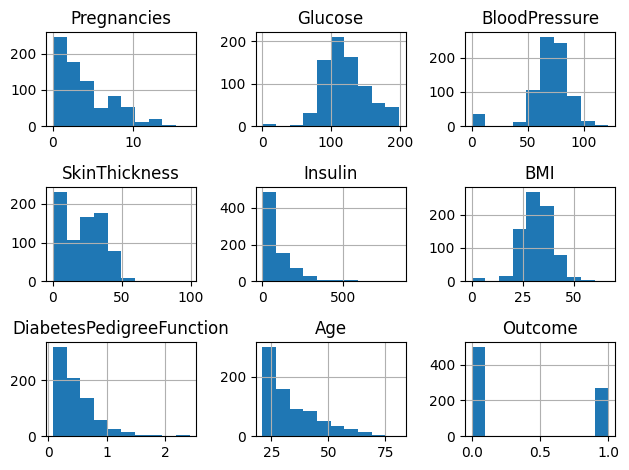

In [21]:
# Histogram Analysis
import pandas as pd
import matplotlib.pyplot as plt

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
#plt.figure(figsize=(8, 8))
data.hist()
plt.tight_layout()
plt.show()

[NB] We can see that the attributes `Pregnancies`, `DiabetesPedigreeFunction`, `Insulin` and `Age` may have an exponential distribution, `Glucose`, `BloodPressure` and `BMI` may have a Gaussian or nearly Gausian distribution.

**Density Plots**

The density plots look like an abstracted histogram with a smooth curve drawn through the top of the each bin.

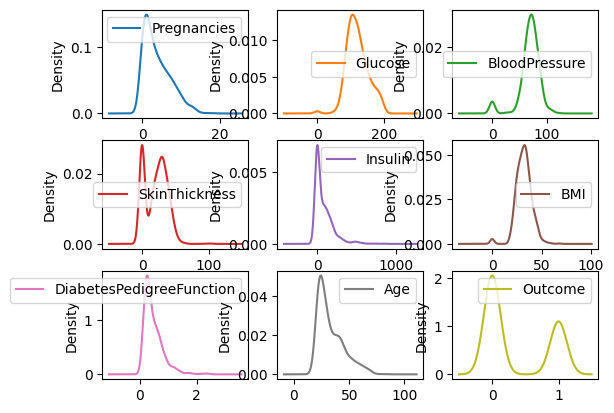

In [24]:
# Density Plots
import pandas as pd
import matplotlib.pyplot as plt

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

**Box and Whisker Plots**

Boxplots summarize the distribution of each attribute, draw a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show the outlier values (values that are 1.5 times greater than the size of the spread of the middle 50% of the data).

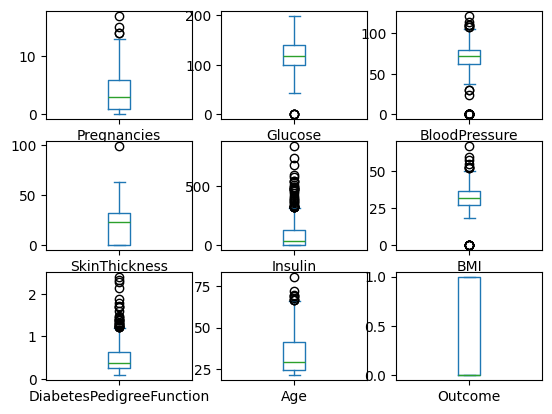

In [25]:
# Histogram Analysis
import pandas as pd
import matplotlib.pyplot as plt

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

##### **4.2.2 Multivariate Plots**

Multivariate plots show the interections between multiple variables in the dataset. In this section we will explore two multivariate plot examples to demstrate the relationship among variables.

**Correlation Matrix Plot**

Correlation gives the indication of how the relationship between two variables changes. If two variables change in the same direction they are positively correlated and if they change in opposite directions together (means- one goes up and one goes down), then they are negatively correlated. The calculation of the correlation between each pair of attributes is called correlation matrix. We can plot the correlation matrix and get an idea of which variables have high correlation with each other.

[NB] Highly correlated variables in data may lead to poor performance in some ml algorithms like - linear and logistic regression.

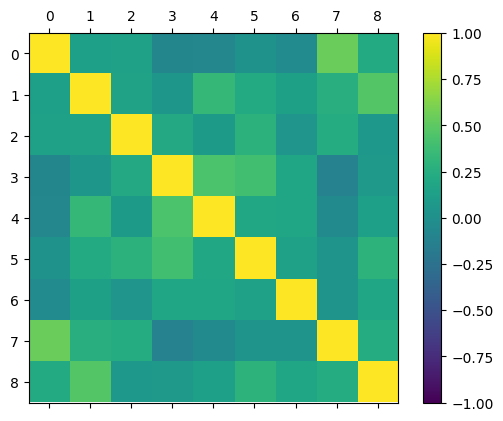

In [3]:
# Correlation Matrix Plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
correlations = data.corr()

# Plot Correlation Matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
# ticks = np.arange(0,9,1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
plt.show()

**Scatter Plot Matrix**

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. Drawing all the scatter plots of all pair of attributes is called scatter plot matrix. Scatter plot summarizes the relationships with a line, so we can spot the structured relationships that are correlated and good candidates for removal from the dataset.

The scatter plot of each variable with itself, the diagonal, shows histograms of each attribute.

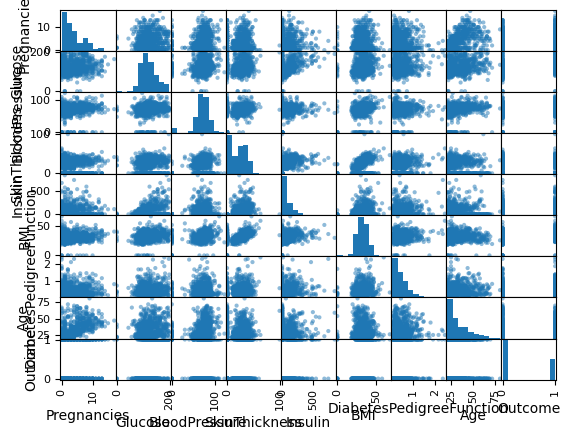

In [6]:
# Scatter Plot Matrix
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
correlations = data.corr()
scatter_matrix(data)
plt.show()

### **Lesson 5: Prepare Data**

#### **5.1 Preprocess Data**
To get the best performance of the machine learning algorithms, it is ideal to prepare the data we intend to use in such a way that best expose the staructure of the problem. In this lesson, we will explore some scikit-learn pre-processing techniques for machine learning analysis.

`Need for Data Pre-Processing`: A difficulty is that different algorithms make different assumptions about the data and they need different transformations. Also, sometimes algorithms can deliver better results without pre-processing. So, it is recommended creating many different views and transforms of the data, then exercixe a handful of algorithms on each view of the dataset. This will help to understand which data transforms might be better at exposing the structure of the problem in general.

The Data Preprocessing combines 4 different recipies for machine learning tasks. For example we will use the 'Pima Indians Diabetes' dataset to explore and understand all the pre-processing recipies, each recipe follows the same structure:
1. Load the data
2. Split tha dataset into input and output variables
3. Apply a pre-processing transform to the input variables
4. Summarize the data to see the change

`Data Transforms`: The main purpose of transform is to make data ready for ml algorithms. The scikit-learn library provides two different techniques for transforming data, each are useful in different circumstances.
1. **Fit and Multiple Transform:** [It is the preferred approach] The `fit()` function is to prepare the parameters of the transform once on the data. Then later we can use the `transform()` function on the same data to prepare it for modeling and on the test data for evaluating.
2. **Combined Fit-And-Transform:** It is convenient if we are interested in plotting or summarizing the transformed data.

Now let's explore the scikit-learn data preprocessing techniques -

##### **5.1.1 Rescale Data**

Rescale is making all the values of different scales into a same range. When the data is comprised of attributes with varying scales, they are often rescaled into the range between 0 and 1, also reffered to as normalization. This is useful for optimizing core machine learning algorithms like gradient discent, algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like k_Nearest Neighbors.

To rescale our pima-indians-diabetes data, here we will use scikit-learn's `MinMaxScaler` class.

In [10]:
# Rescale Data (0 - 1)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_x = scaler.fit_transform(x)
np.set_printoptions(precision=2)
print(rescaled_x[0:5,:])

[[0.35 0.74 0.59 0.35 0.   0.5  0.23 0.48]
 [0.06 0.43 0.54 0.29 0.   0.4  0.12 0.17]
 [0.47 0.92 0.52 0.   0.   0.35 0.25 0.18]
 [0.06 0.45 0.54 0.23 0.11 0.42 0.04 0.  ]
 [0.   0.69 0.33 0.35 0.2  0.64 0.94 0.2 ]]


##### **5.1.2 Standardize Data**

Standardization basically scale the data following the standard gausian distribution where the mean is 0 and the standard deviation is 1. The algorithms which assume that the input variables follow a Gausian distribution, standardization is suitable for them such as linear and logistic regression, linear discriminant analysis etc.

Scikit-learn has a class named `StandardScaler` for standardization.

In [13]:
# Standardize Data (mean=0, std=1)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
scaler = StandardScaler().fit(x)
standardized_x = scaler.transform(x)
np.set_printoptions(precision=2)
print(standardized_x[0:5,:])

[[ 0.64  0.85  0.15  0.91 -0.69  0.2   0.47  1.43]
 [-0.84 -1.12 -0.16  0.53 -0.69 -0.68 -0.37 -0.19]
 [ 1.23  1.94 -0.26 -1.29 -0.69 -1.1   0.6  -0.11]
 [-0.84 -1.   -0.16  0.15  0.12 -0.49 -0.92 -1.04]
 [-1.14  0.5  -1.5   0.91  0.77  1.41  5.48 -0.02]]


##### **5.1.3 Normalize Data**

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (aka a unit norm or a vector with the length of 1 in linear algebra). Normalization is useful for sparse datasets (lots of zeros), datasets having attributes of varying scales, using algorithms taht weight input values like neural networks and algorithms that use distance measures such as k-Nearest Neighbours.

Scikit-learn has `Normalizer` class.

In [1]:
# Normalize Data (mean=0, std=1)
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
scaler = Normalizer().fit(x)
normalized_x = scaler.transform(x)
np.set_printoptions(precision=2)
print(normalized_x[0:5,:])

[[0.03 0.83 0.4  0.2  0.   0.19 0.   0.28]
 [0.01 0.72 0.56 0.24 0.   0.22 0.   0.26]
 [0.04 0.92 0.32 0.   0.   0.12 0.   0.16]
 [0.01 0.59 0.44 0.15 0.62 0.19 0.   0.14]
 [0.   0.6  0.17 0.15 0.73 0.19 0.01 0.14]]


##### **5.1.3 Binarize Data [Make Binary]**

Binarize specify a binary threshold value to transform values above the threshold as 1 and equal to or below as 0, also called `Thresholding`. It can be useful when we have probabilities and we want to make values crisp, also useful for feature engineering and we want to add new features that indicate something meaningful.

We can create new binary attributes using ccikit-learn `Binarizer` class.

In [2]:
# Binarize Data (mean=0, std=1)
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
binarizer = Binarizer(threshold=0.0).fit(x)
binarized_x = binarizer.transform(x)
np.set_printoptions(precision=2)
print(binarized_x[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


#### **5.2 Feature Selection**
Irrelevant or partially relevant features can negetavily impact model performance. Having only relevant features reduces overfitting, improve accuracy amd reduces training time. Linear algorithms like linear and logistic regression affects most due to irrelevant features.

In this section we will discover automatic feature selection techniques that we can use to prepare our machine learning data using scikit-learn.

##### **5.2.1 Univariate Selection**

Univariate selection is the process of selecting those features that have the strongest relationship with the output variable. Statistical methods like `chi-squared` test can be used for non-negetive features to select the best features. Scikit-learn library provides `SelectKBest` class that allows different statistical tests to select a specific number of features.

Attributes of specific numbers with with highest scores will be considered as selected features. 

Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Scores  : [ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
Selected Features: [('Glucose', 1411.887040644141), ('Insulin', 2175.5652729220137), ('BMI', 127.66934333103643), ('Age', 181.30368904430023)]


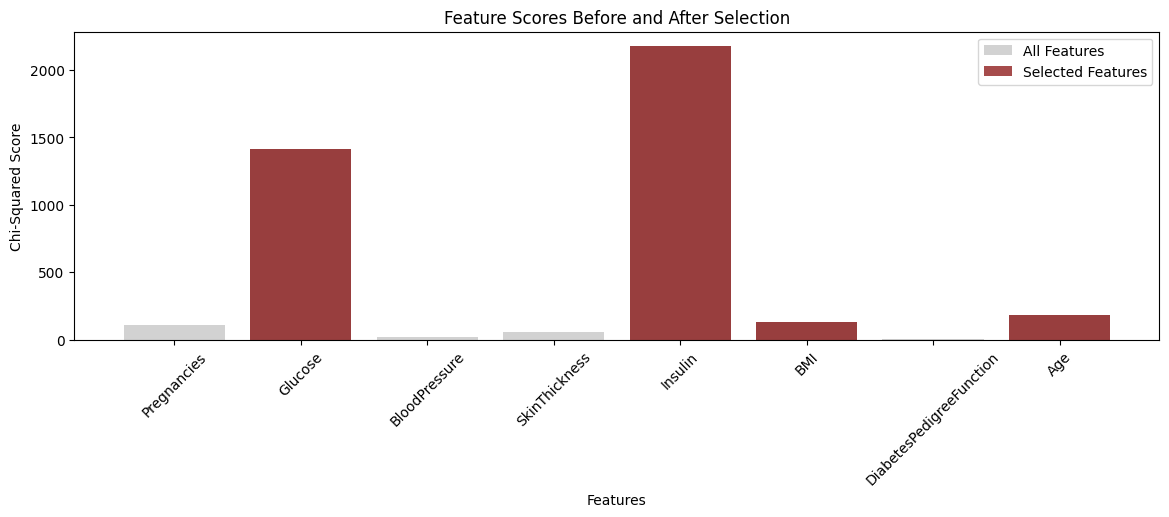

In [27]:
# Univariate Selection (chi2, 4)
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
# Feature Extraction
test = SelectKBest(score_func=chi2, k=4)    # select best 4 features
fit = test.fit(x, y)
# Check All Attributes Scores
print(f"Features: {list(data.columns)}")
np.set_printoptions(precision=3)
print(f"Scores  : {fit.scores_}")
# Get mask of selected features
mask = fit.get_support(indices=True)
selected_features = [(data.columns[i], fit.scores_[i]) for i in mask]
# Print selected features with their corresponding scores
print(f"Selected Features: {selected_features}")

# Plot all feature scores
plt.figure(figsize=(14, 4))
plt.bar(data.columns[:-1], fit.scores_, color='silver', alpha=0.7, label='All Features')

# Highlight selected features
selected_feature_names = [data.columns[i] for i in mask]
selected_feature_scores = [fit.scores_[i] for i in mask]
plt.bar(selected_feature_names, selected_feature_scores, color='maroon', alpha=0.7, label='Selected Features')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Chi-Squared Score')
plt.title('Feature Scores Before and After Selection')
plt.legend()
plt.xticks(rotation=45)
plt.show()

##### **5.2.2 Recursive Feature Elemination**

The Recursive Featute Elemination (RFE) works by recursively removing attrinutes and building a model on those attributes that remains. It uses the model accuracy to identify which attribute or combination of attributes contribute the most to predict the target attribute.

It marks the selected attributes (specified number) as `True` in the support array and as 1 in the ranking array. Other attributes are marked as `False` and by consecutive decimal values in the support array and ranking array respectively.

No of Features   : 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking  : [1 1 3 5 4 1 1 2]


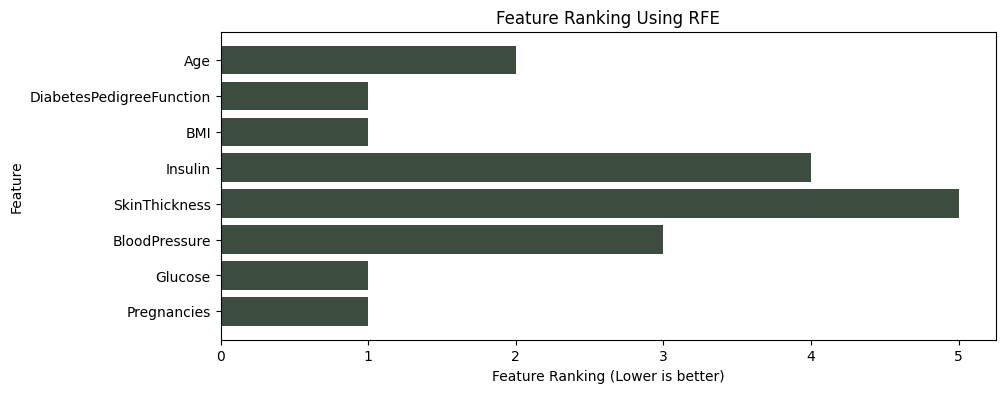

In [24]:
# Recursive Feature Elemination
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
# Feature Extraction
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(x, y)
print(f"No of Features   : {fit.n_features_}")
print(f"Selected Features: {fit.support_}")
print(f"Feature Ranking  : {fit.ranking_}")

# Visualize Feature Ranking
feature_names = data.columns[:-1]
ranking = fit.ranking_
plt.figure(figsize=(10, 4))
plt.barh(feature_names, ranking, color='#3c4d40')
plt.xlabel("Feature Ranking (Lower is better)")
plt.ylabel("Feature")
plt.title("Feature Ranking Using RFE")
plt.show()

##### **5.2.3 Principal Component Analysis**

PCA, also called Data Reduction Tecnique, reduces the number of variables in the dataset by transforming the original variables into a new set of variables called principal components. These components are orthogonal (uncorrelated) and ranked according to the amount of variance they capture from the data.

The first principal component captures the most variance in the data, the second captures the second most variance, and so on. This helps in simplifying the dataset while retaining the important information.

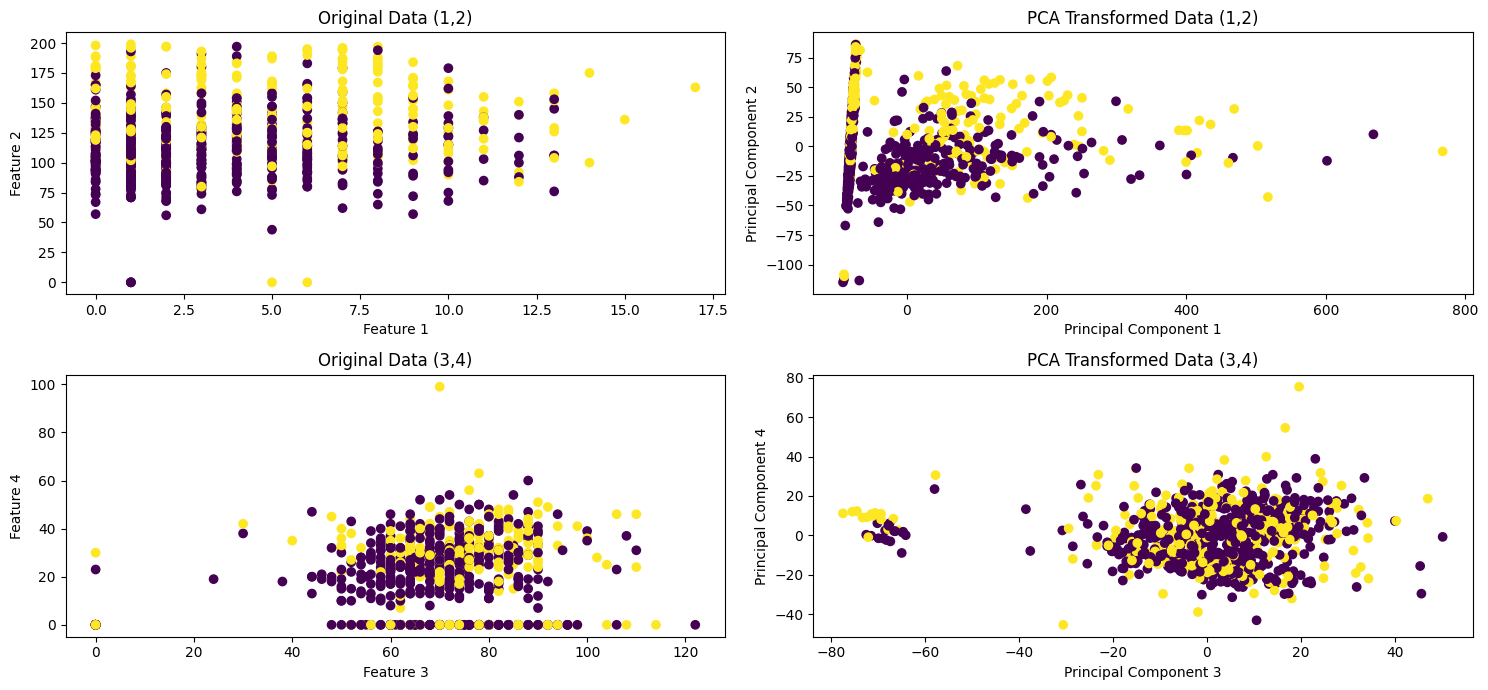

In [13]:
# Principal Component Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Feature Extraction
pca = PCA(n_components=4)
fit = pca.fit(x)
transformed_data = pca.transform(x)

# print(f"Captured Variance: {fit.explained_variance_ratio_}")
# print(f"{fit.components_}")

# Plot original data (first two)
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Original Data (1,2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# Plot PCA transformed data (first two)
plt.subplot(2, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y)
plt.title("PCA Transformed Data (1,2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot original data (last two)
plt.subplot(2, 2, 3)
plt.scatter(x[:, 2], x[:, 3], c=y)
plt.title("Original Data (3,4)")
plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
# Plot PCA transformed data (last two)
plt.subplot(2, 2, 4)
plt.scatter(transformed_data[:, 2], transformed_data[:, 3], c=y)
plt.title("PCA Transformed Data (3,4)")
plt.xlabel("Principal Component 3")
plt.ylabel("Principal Component 4")

plt.tight_layout()
plt.show()

##### **5.2.4 Feature Importance**

Feature Importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. Bagged decision trees like `Random Forest` and `Extra Tree` classifiers can be used to estimate the importance of the features.

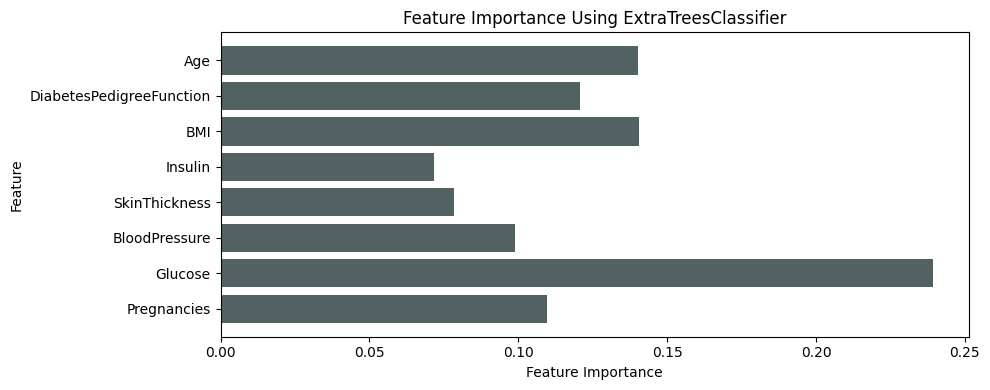

In [23]:
# Feature Importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Feature Extraction
model = ExtraTreesClassifier()
model.fit(x, y)
#print(f"{model.feature_importances_}")
importances = model.feature_importances_
feature_names = data.columns[:-1]

# Visualize feature importances
plt.figure(figsize=(10, 4))
plt.barh(feature_names, importances, color='#526263')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Using ExtraTreesClassifier")
plt.tight_layout()
plt.show()

### **Lesson 6: Evaluate Algorithms**
Evaluation is an estimation of how well our algorithm may perform on unseen data / in practice. It is not a guarantee of performance. Once we estimate the performance of our algorithm, we can then re-train it on the whole dataset and make it ready for operational use.

The best way to evaluate the performance of an algorithm would be to let the algorithm make predictions on already known answers. Also we can evaluate an algorithms performace in several ways. In this section we will explore some commonly used performance evaluating techniques.

#### **6.1 Resampling Methods**
Resampling involves repeatedly drawing samples from a training set and evaluating a model on each sample to get an estimation of the model's performance.

In this chapter you will discover how we can estimate the accuracy of the machine learning algorithms using resampling methods in Python and scikit-learn on the Pima Indians dataset.

##### **6.1.1 Split into Train-Test Sets**

This evaluation technique is very fast and useful when the algorithm we are investigating is slow to train. The size of the split can depend on the size and specifics of the dataset. But usually we use 70% : 30% or 80% : 20% for training and testing respectively.

One downside of this technique is that it can have a high variance, means - the model performs well on the training data but poorly on unseen test data, indicating that it has overfitted the training data.

In [5]:
# Evaluate using train and test set
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# Evaluate a Model
model = LogisticRegression()
model.fit(x_train, y_train)
result = model.score(x_test, y_test)
print(f"Accuracy: {result*100:.2f} %")

Accuracy: 77.27 %


##### **6.1.2 K-fold Cross Validation**

K-fold cross validation works by splitting the dataset into k-parts, each part is called a fold. The model is trained and validated k times. In each iteration, one fold is used as the validation set, and the remaining k-1 folds are used for training. After that k different performance scores are summarized using mean and standard deviation.

This approach estimate the performance with less variance than a single train-test split. It is more accurate because the algorithm is trained and evaluated multiple times on different data.

In [6]:
# Evaluate using K-fold Cross Validation
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
# Setup cross validate
kfold = KFold(n_splits=10)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% with (STD: {results.std()*100:.4f}%)")

Accuracy: 77.21% with (STD: 5.2097%)


##### **6.1.3 Leave One Out Cross validation**

Instead of splitting the dataset into folds, we can use 1 different sample for validation in each iteration. This variation of cross validation is called leave-one-out cross validation. This can give a more reasonable estimate of the accuracy of the model on unseen data.

One downside is that it can be a computationally more expensive than k-fold cross validation.

In [1]:
# Evaluate using Levae-One-Out Cross Validation
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
# Setup cross validate
loo_cv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, x, y, cv=loo_cv)
print(f"Accuracy: {results.mean()*100:.2f}% with (STD: {results.std()*100:.4f}%)")

Accuracy: 77.86% with (STD: 41.5158%)


##### **6.1.4 Repeated Random Train-Test Splits**

Repeated random train-test splits is a mixture of k-fold cross validation and train-test split described earlier. It randomly split the data with a test size like train-test split but repeat the splitting and evaluation process multile times like k-fold cross validation.

The advantage is that, it has the speed of using train-test split and capability of reducing varience of k-fold cross validation. One downside is that repetitions may include same data in the train or test split, causing redundancy in the evaluation.

In [2]:
# Evaluate using Levae-One-Out Cross Validation
import pandas as pd
import numpy as np
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
# Setup cross validate
folds = ShuffleSplit(n_splits=10, test_size=0.2)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv=folds)
print(f"Accuracy: {results.mean()*100:.2f}% with (STD: {results.std()*100:.4f}%)")

Accuracy: 76.75% with (STD: 2.8865%)


##### **`What Techniques to Use When`**
* Generally *`K-fold`* cross validation is the gold standard with k set to 3, 5 or 10.
* *`Train-Test Split`* is good for speed when using a slow algorithm and large dataset.
* Techniques like *`Leave-One-Out`* and *`Repeated Randon Splits`* can be useful for intermediates (trying to balance variance, moderate model training speed and medium size dataset).

#### **6.2 Algorithm Evaluation Metrics**
Evaluation metrics are crucial for evaluating machine learning algorithms because they provide a quantitative basis to measure how well a model is performing. Choice of metrics influences how the performance of machine learning algorithms is measured and compared. In this chapter you will discover how to select and use different machine learning performance metrics for both classification and regression problem with scikit-learn.

* For **classification** metrics demonstration we will use the 'Pima Indian Diabetes' dataset which is a binary classification problem.
* For **regression** we will use the 'Boston House Price' dataset.

To evaluate classification problem we will use `Logistic Regression` and for regression analysis we will use `Linear Regression`, and a 10-fold cross validation test harness will be used to demonstrate the metrics.

##### **6.2.1 Classification Metrics**

In this section we will explore commonly used classification metrics evaluation techniques and there best use case.

**Classification Accuracy**

Commonly used in classification problem, suitable when there are equal number of obserbations in each class (which is rare, hence the most misused). Accuracy is the number of correct predictions among all the predictions.

In [1]:
# Classification Accuracy
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
# Setup Validation
kfold = KFold(n_splits=10)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"Accuracy: {results.mean()*100:.2f}% with (STD: {results.std()*100:.4f}%)")

Accuracy: 77.21% with (STD: 5.2097%)


**Logarithmic Loss**

Logarithmic loss (aka log loss or binary cross-entropy loss) measures how close the predicted probabilities are to the actual class labels. If the prediction is correct and confident (close to 1), the loss is low. If the prediction is incorrect and confident (close to 0), the loss is high. It provides a smooth measure of performance, which is useful when you need to compare models or perform tasks like hyperparameter tuning.

Smaller logloss is better, 0 represents a perfect logloss. To align with the convention of higher scores being better, the log loss is multiplied by -1 in cross_val_score. So, the negetive logloss is basically a positive value which is inverted to the ascending when using the cross_val_score.

In [5]:
# Logarithmic Loss
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
# Setup Validation
kfold = KFold(n_splits=10)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"LogLoss: {results.mean():.4f} with (STD: {results.std():.4f})")

LogLoss: -0.4858 with (STD: 0.0642)


**Area Under ROC Curve**

Area under ROC curve (aka AUC) is a performance matric for binary classification problems. The area value near to 1.0 represents perfect predictions and close to represents poor performance, the area 0.5 represents the model is as good as random. ROC is the representation of sensitivity and specificity since, binary classification problem is really a trade-off between these two.
* `Sensitivity` is the true positives among all the positives, also called Recall or True Positive Rate, that is: true_positive / true_positive + false_negetive
* `Specificity` also called Ture Negetive Rate, is the true negetives among all the negetives, that is: true_negetive / true_negetive + false_positive

In [2]:
# Area Under ROC Curve
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
# Setup Validation
kfold = KFold(n_splits=10)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"AUC: {results.mean():.4f} with (STD: {results.std():.4f})")

AUC: 0.8265 with (STD: 0.0430)


**Confusion Matrix**

A confusion matrix is a table used to evaluate the performance of a classification algorithm. It shows how well the model's predictions match the actual outcomes. The matrix has four main components:<br>
* `ture_positive`: perfectly classified positive - Emails correctly identified as spam<br>
* `false_positive`: misclassified as positive, basically they were negative - Emails incorrectly identified as spam (but they are not)<br>
* `true_negative`: perfectly classified negative - Emails correctly identified as not spam<br>
* `false_negative`: misclassified as negative, basically they were positive - Emails incorrectly identified as not spam (but they are)

<div style="padding-left: 40px;">

|                | **Predicted Positive** | **Predicted Negative** |
|----------------|------------------------|------------------------|
| **Actual Positive** | TP                     | FN                     |
| **Actual Negative** | FP                     | TN                     |

</div>

In [5]:
# Confusion Matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
# Split data into train test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(f"Confusion Matrix:\n{matrix}")

Confusion Matrix:
[[125  18]
 [ 42  46]]


**Classification Report**

A classification report is a summary of the performance of a classification algorithm. It provides key metrics for evaluating how well the model has performed in predicting classes. The main components of a classification report:

1. `Precision:` The proportion of true positive predictions out of all positive predictions made by the model. It tells how many of the predicted positive instances are actually positive.
2. `Recall (Sensitivity or True Positive Rate):` The proportion of true positive predictions out of all actual positive instances in the data. It tells how well the model captures all positive instances.
3. `F1-Score:` The harmonic mean of precision and recall. It provides a balance between precision and recall, especially useful when we need to seek a balance between these two metrics.
4. `Support:` The number of actual occurrences of the class in the dataset. It helps to understand the distribution of classes in your data.
5. `Accuracy:` The overall percentage of correctly predicted instances out of all instances.

In [6]:
# Classification Report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]
# Split data into train test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = classification_report(y_test, predicted)
print(f"Classification Report:\n{matrix}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       145
         1.0       0.77      0.55      0.64        86

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.74       231
weighted avg       0.77      0.77      0.76       231



##### **6.2.2 Regression Metrics**

In this section we will explore three most common metrices for evaluating predections on regression analysis. For this analysis we will use 'Concrete' dataset.

**Mean Absolute Error**

Mean absolute error (MSE) is the sum of the absolute differences bertween predictions and actual values. The measure gives an idea of the magnitude of the error, but no idea of the dirrection (over or under prediction).

In [15]:
# Mean Absolute Error
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/concrete_data.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = LinearRegression()
kfold = KFold(n_splits=10)
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, x, y, scoring=scoring)
print(f"MAE: {results.mean():.4f} with (STD: {results.std():.4f})")

MAE: -8.9254 with (STD: 1.7127)


**Mean Squared Error**

The Mean Squared Error (MSE) measures the average of the squares of the errors - that is, the average squared difference between the predicted values and the actual values. It provides a gross idea of the magnitude (how big the difference is) of error. Taking the square root of the MSE get back the error to its original form which is called Root Mean Squared Error (RMSE).

In [2]:
# Mean Squared Error
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/concrete_data.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = LinearRegression()
kfold = KFold(n_splits=10)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, x, y, scoring=scoring)
print(f"MSE: {results.mean():.4f} with (STD: {results.std():.4f})")

MSE: -128.1378 with (STD: 47.3726)


**R2 Matric**

The R2 (or R-Squared) assess the goodness of fit of a model. It measures the proportion of the variance in the dependent variable (the target variable) that is predictable from the independent variables (the features).

For example - Suppose you have a regression model that predicts house prices based on factors like square footage, number of bedrooms, and location. If the R^2 value is 0.85, it means that 85% of the variance in house prices can be explained by these factors.

In [3]:
# R Squared Error
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/concrete_data.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = LinearRegression()
kfold = KFold(n_splits=10)
scoring = 'r2'
results = cross_val_score(model, x, y, scoring=scoring)
print(f"R-Squared: {results.mean():.4f} with (STD: {results.std():.4f})")

R-Squared: 0.4610 with (STD: 0.0925)


#### **6.3 Spot-Check Classification Algorithms**
Spot-cheecking means discovering which algorithms perform well for the machine learning task. Generraly we cannot know which algorithm will work best on the dataset beforehand. We can guess what algorithms might do well on the dataset for a good start. But the recommendation is trying a mixture of algorithms and see what is good for our data. Some suggestions would be:
* Try a mixture of algorithms
* Try a mixture of learning algorithms (different algorithms for the same type of representation)
* Try a mixture of modeling (linear and non-linear functions)

Here we will going to spot-check six classification algorithms on the 'Pima Indian Diabetes' dataset with two linear and four non-linear algorithms.<br>
`Linear Algorithms`
1. Logistic Regression
2. Linear Discriminant Analysis

`Non-Linear Algorithms`
1. K-Nearest Neighbours
2. Naive Bayes
3. Classification and Regression Trees
4. Support Vector Machines

##### **6.3.1 Linear Classification Algorithms**
**Logistic Regression**

Logistic regression, which is used for binary classification, uses sigmoid function to calculate the probability of the occurance of an event. It calculates a linear combination of the input features, similar to linear regression, that uses a threshold of 0.5 to decide the class label.

In [3]:
# Logistic Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = LogisticRegression()
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% with (STD: {results.std():.4f})")

Accuracy: 77.21% with (STD: 0.0521)


**Linear Discriminant Analysis**

Linear Discriminant Analysis (or LDA) normaly used for multi-class classification problem, useful when there are large number of features in comparison with number of obserbations. LDA, like Logistic Regression, also assumes that the data is normally distributed and try to find the best linear combination of features that seperates the classes. LDA also used as dimensionality reduction technique.

In [1]:
# Linear Discriminant Analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% with (STD: {results.std():.4f})")

Accuracy: 77.35% with (STD: 0.0516)


##### **6.3.2 Non-Linear Classification Algorithms**
**K-Nearest Neighbors**

K-Nearest Neighbours (aka KNN) uses a distance metric (commonly Euclidean Distance) to find the k most similar instances in the training data and takes the mean of the k-neighbors as predicted outcome. KNN is often referred as 'lazy learner' because it doesn't build an internal model during the training phase, rather it uses emtire training dataset during prediction. KNN is also used for Regression.

In [2]:
# K-Nearest Neighbors
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = KNeighborsClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% with (STD: {results.std():.4f})")

Accuracy: 72.66% with (STD: 0.0618)


**Naive Bayes**

Naive Bayes calculates the probability of each possible outcome (or class) and then determine how likely each input value is for each class. It does it assuming that all features are independent of each other, no relationship, hence 'naive'.

For continuous data, it often assumes that the data follows a Gaussian (Normal) distribution and calculates probabilities for each input feature by multiplying these probabilities and picking the class with the highest result. 

In [3]:
# Naive Bayes
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = GaussianNB()
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% with (STD: {results.std():.4f})")

Accuracy: 75.52% with (STD: 0.0428)


**Classification and Regression Trees**

Classification and Regression Trees (aka CART or just Decision Trees) work by spliting the training data into two parts at each step based on a chosen metric like 'Gini Index'. The splits are made to minimize the cost so that similar data points end up in the same group. The better the split, the lower the cost.

In [4]:
# Classification and Regression Trees
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = DecisionTreeClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% with (STD: {results.std():.4f})")

Accuracy: 70.43% with (STD: 0.0598)


**Support Vector Machine**

Support Vector Machine (or SVM) looks for a line that best seperates two classes of data. The points closest to this line are called support vectors and they determine where the line (boundary) is placed.

SVM uses different mathematical functions to find the best line, Radial Basis Function (RBF) is the most commonly used one. SVM can be used for more than two classes.

In [6]:
# Support Vector Machine
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = SVC()
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% with (STD: {results.std():.4f})")

Accuracy: 76.04% with (STD: 0.0529)


#### **6.4 Spot-Check Regression Algorithms**
In this chapter, we will discover seven machine learning algorithms for regression problem analysis. For this analysis we will use the `Boston House Price` dataset. The main advantage of this dataset is all the attributes are numeric. We will use a test harness with `10-fold cross validation` and `cross_val_score()` for metric evaluation.<br>
**Linear Regression Algorithms:**
1. Linear Regression
2. Ridge Regression
3. LASSO Linear Regression
4. Elastic Net Regression

**Non-Linear Regression Algorithms:**
1. k-Nearest Neighbors
2. Classification and Regression Tress
3. Support Vedtor Machines

##### **6.4.1 Linear Regression Algorithms**
**Linear Regression**

Linear regression assumes that the input variables have a Gaussian distribution and also assumes that they are not highly correlated but relevant.

In [5]:
# Linear Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
#data.head()
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = LinearRegression()
kfold = KFold(n_splits=10)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"Error: {results.mean():.4f}")

Error: -34.7053


**Ridge Regression**

Ridge regression is an extension of linear regression where it uses a more simplified loss function, measured as the sum squared value of the coefficient values (aka L2-norm), to minimize the complexity of the model.

In [1]:
# Ridge Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
#data.head()
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = Ridge()
kfold = KFold(n_splits=10)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"Error: {results.mean():.4f}")

Error: -34.0782


**LASSO Regression**

The Least Absolute Shrinkage and Selection Operator (LASSO) is also a modification of linear regression where it also use a more simple loss function, sum absolute value of the coefficient (aka L1-norm), to minimize the complexity of the model.

In [2]:
# LASSO Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
#data.head()
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = Lasso()
kfold = KFold(n_splits=10)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"Error: {results.mean():.4f}")

Error: -34.4641


**ElasticNet Regression**

ElasticNet regression is the combination of Ridge and LASSO regression. It uses both the L1-norm (sum absolute cofficient values) and L2-norm (sum squared coefficient values) loss function to minimize the complexity of the regression model. 

In [3]:
# ElasticNet Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
#data.head()
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = ElasticNet()
kfold = KFold(n_splits=10)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"Error: {results.mean():.4f}")

Error: -31.1646


##### **6.4.2 Non-Linear Regression Algorithms**
**K-Nearest Neighbors**

The k-nearest neighbours (KNN) consider the `k` most similar instances in the training dataset for a new data instance. The mean or median of those instances is taken as the predection. The default distance measure metric is Minkowski distance which is a generalization of both the Euclidean and Manhattan distance. Euclidean distance is used when all the inputs are in the same scale and Manhattan distance is used when the scale is different.

In [2]:
# K-Nearest Neighbors
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
#data.head()
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = KNeighborsRegressor()
kfold = KFold(n_splits=10)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"Error: {results.mean():.4f}")

Error: -107.2868


**Classification and Regression Trees**

Decession tress or the Classification and Regression Tress (aka CART) use training data to select the best points to split the data in order to minimize the cost metric. The default cast metric is the mean squared error.

In [3]:
# Decission Tree Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
#data.head()
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = DecisionTreeRegressor()
kfold = KFold(n_splits=10)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"Error: {results.mean():.4f}")

Error: -35.4509


**Support Vector Machines**

In classification, SVM tries to find a hyperplane that best separates data points of different classes. In SVR, instead of classification, it tries to predict a continuous value by finding a hyperplane (in a higher-dimensional space) that fits the data points within a certain error margin.

In [4]:
# Support Vector Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
#data.head()
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

model = SVR()
kfold = KFold(n_splits=10)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(f"Error: {results.mean():.4f}")

Error: -72.2554


#### **6.5 Model Selection (Compare ML Algorithms)**
In this section we will create a test harness to compare multiple different ml algorithms with scikit-learn. We can use a number of different ways to estimate accuracy of ml algorithms in order to choose the one or two best performing algorithms to finalize. One of the ways is to visualize methods to show the accuracy, variance and other properties of the distribution of model accuries.

##### **6.5.1 Compare Classification Algorithms**

To fair comparisn, it is to be ensured that each algorithm is evaluated in the same way on the same data. Here, the six different classification algorithms will be evaluated on a consistant test harmess. `Pima Indian Diabetes` dataset has two classes and eight numeric input variables of variying scales. The algorithms will be evaluated using same 10-fold cross validation technique with same splits and in precisely the same way.

  LR: 77.21% (STD: 0.0521)
 LDA: 77.35% (STD: 0.0516)
 KNN: 72.66% (STD: 0.0618)
CART: 68.10% (STD: 0.0594)
  NB: 75.52% (STD: 0.0428)
 SVM: 76.04% (STD: 0.0529)


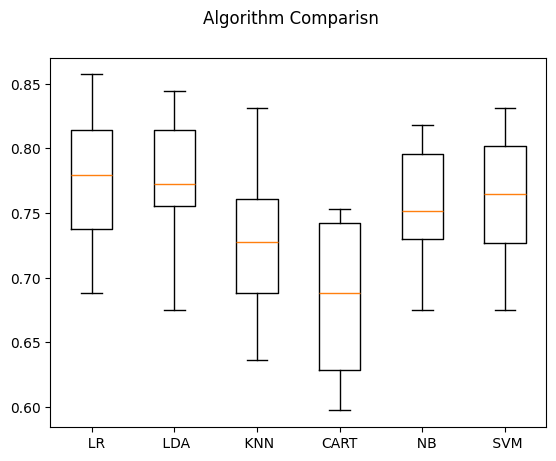

In [4]:
# Compare Classification Algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Prepare Model
models = []
models.append(('  LR', LogisticRegression()))
models.append((' LDA', LinearDiscriminantAnalysis()))
models.append((' KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('  NB', GaussianNB()))
models.append((' SVM', SVC()))

# Evaluate Model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100:.2f}% (STD: {cv_results.std():.4f})")

# Plot the Algorithm Comparisn
fig = plt.figure()
fig.suptitle('Algorithm Comparisn')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

`Based on the accuracy results the Linear Discriminant Analysis (LDA) is the best performing algorithm with the highest accuracy at 77.35% and lowest standard deviation of 0.0516 among the six we tested.`

##### **6.5.2 Compare Regression Algorithms**

   LR: -34.7053% (STD: 45.5740)
RIDGE: -34.0782% (STD: 45.9000)
LASSO: -34.4641% (STD: 27.8886)
 ENET: -31.1646% (STD: 22.7087)
  KNN: -107.2868% (STD: 79.8395)
  SVM: -72.2554% (STD: 61.9605)


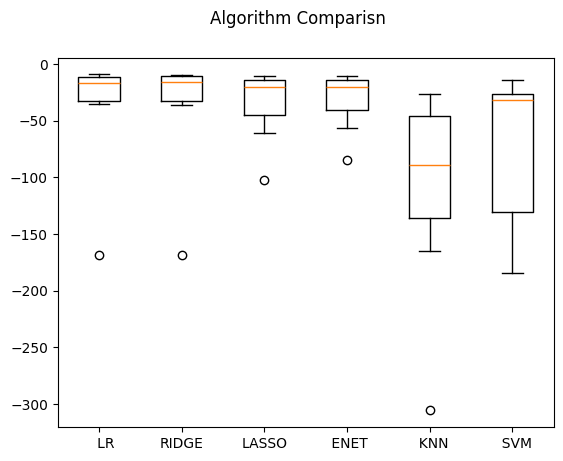

In [5]:
# Compare Regression Algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Prepare Model
models = []
models.append(('   LR', LinearRegression()))
models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))
models.append((' ENET', ElasticNet()))
models.append(('  KNN', KNeighborsRegressor()))
models.append(('  SVM', SVR()))

# Evaluate Model
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f}% (STD: {cv_results.std():.4f})")

# Plot the Algorithm Comparisn
fig = plt.figure()
fig.suptitle('Algorithm Comparisn')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

`Based on the results the Elastic Net (ENET) algorithm appears to be the best-performing model.`
* `ENET has the least negative mean squared error at -31.1646% with a standard deviation of 22.7087.`
* `A less negative value indicates a smaller error, meaning the predictions are closer to the actual values.`
* `ENET’s standard deviation is relatively lower compared to other models, suggesting more consistent performance.`

#### **6.6 Pipelines (Automate ML Workflows)**
Scikit-learn provides a Pipeline utility to help automate ml workflows which helps to overcome common problems like - data leakage in the test harness. The goal is to ensure that all of the steps in the pipeline are constrained to the data available for the evaluation, like - training the dataset or for each fold of the cross validation procedure. We will check two pipeline procedures here.

##### **6.6.1 Data Preparation and Modeling Pipeline**
Data preparation is one of the ways of giving a knowledge about the data to the algorithm. But techniques like normalization or standardization on the entire training dataset before learning wouls not be a valid test because the training dataset would have been influenced by the scale of the data in the test set.

Pipelines help in preventing data leakage in the test harness by ensuring that data preparation technique is constrained to each fold of the cross validation procedure. The pipeline is defined with two steps:
1. Standardize the data
2. Learnn a Linear Discriminant Analysis model

**Pipeline of Standerdization for Classification Algorithm (Pima Indians Diabates Dataset)**

In [8]:
# Create Pipeline for Standardization of the Data
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Create Pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)

# Evaluate Pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold) # default scoring='accuracy'
print(f"Accuracy: {results.mean()*100:.2f}% (STD = {results.std():.4f})")

Accuracy: 77.35% (STD = 0.0516)


**Pipeline of Standardization for Regression Algorithm (Boston Housing Dataset)**

In [5]:
# Create Pipeline for Standardization of the Data
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Create Pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('enet', ElasticNet()))
model = Pipeline(estimators)

# Evaluate Pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold) # default scoring='L2'
print(f"Error: {results.mean():.4f} (STD = {results.std():.4f})")

Error: 0.2324 (STD = 0.4525)


##### **6.6.2 Feature Extraction and Modeling Pipeline**
Feature extraction is another process that is susceptible to data leakage. The pipeline provides handy tool, `FeatureUnion`, that allows combining the results of multiple frature selection and extraction procedures into a large dataset and model to train on this dataset. All the feature extraction and the feature union process occurs within each fold of the cross validation procedure. We will use the following steps in feature extraction and modeling pipeline:
1. Feature extraction with Principle Component Analysis (3 features)
2. Feature extraction with Statistical Selection (6 features)
3. Feature Union
4. Learn a Logistic Regression Model

**Pipeline of Feature Selection for Classification Algorithm (Pima Indians Diabetes Dataset)**

In [7]:
# Create Pipeline for Feature Selection of the Data
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Create Feature Union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# Create Pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)

# Evaluate Pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold) # default scoring='accuracy'
print(f"Accuracy: {results.mean()*100:.2f}% (STD = {results.std():.4f})")

Accuracy: 77.35% (STD = 0.0516)


**Pipeline of Feature Selection for Regression Algorithm (Boston Housing Price Dataset)**

In [8]:
# Create Pipeline for Feature Selection of the Data
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Create Feature Union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# Create Pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('enet', ElasticNet()))
model = Pipeline(estimators)

# Evaluate Pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, x, y, cv=kfold) # default scoring='L2'
print(f"Error: {results.mean():.4f} (STD = {results.std():.4f})")

Error: -0.0243 (STD = 0.5304)


### **Lesson 7: Improve Results**
We can tweak machine learning algorithms to improve their performance. In this section we will explore two such performance improving techniques of machine learning algorithms.<br>
**1. Ensemble Methods**<br>
**2. Algorithm Parameter Tuning**

#### **7.1 Ensemble Methods**
Ensembles give a boost in accuracy on the dataset. Here, we will check some of the powerful ensemble techniques using scikit-learn. There are three popular methods of ensembling predictions from different models:
* **Bagging:** Building multiple models (same type) from different subsamples of the training dataset.
* **Boosting:** Building multiple models (same type) each of which learns to fix the prediction errors of a prior model in the sequence of models.
* **Voting:** Building multiple models (different type) and simple statistics (calculating the mean) are used to combine predictions.

##### **7.1.1 Bagging Algorithms**
Bootstrap Aggregation (Bagging) takes multiple samples from the training dataset and training a model for each sample. The average of the predictions of all the sub-models is considered the final prediction. Here, we will cover theree bagging models:

**Bagged Decision Trees**

Standalone decission tree is very sensetive of data variance and often overfit. Since in decision trees, each tree sees a different subset of the data, bagging reduces variance by averaging the predictions of multiple trees, leading to more robust and accurate predictions. This also helps prevent overfitting.

Here, we will explore a classification problem with the `BaggingClassifier` on top of `DecissionTreeClassifier` total of 100 trees.

In [4]:
# Bagged Decission Trees for Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Evaluate Model
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
model = BaggingClassifier(estimator=cart, n_estimators=100)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% (STD={results.std():.4f})")

Accuracy: 76.82% (STD=0.0706)


Here, we will explore a classification problem with the `BaggingRegressor` on top of `DecissionTreeRegressor` total of 100 trees.

In [8]:
# Bagged Decission Trees for Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Evaluate Model
kfold = KFold(n_splits=10)
cart = DecisionTreeRegressor()
model = BaggingRegressor(estimator=cart, n_estimators=100)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Error: {results.mean():.4f} (STD={results.std():.4f})")

Error: 0.4959 (STD=0.3511)


**Random Forest**

Random forest is an extension of bagged decision trees. The data replacement technique is same but the trees are constructed in a way that reduces the correlation between individual classifiers. It considers a random subset of features for each split rather than choose greedly like decision tree.

We can construct a random forest classifier using the `RandomForestClassifier` class.

In [10]:
# Random Forest Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Evaluate Model
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% (STD={results.std():.4f})")

Accuracy: 76.30% (STD=0.0600)


We can construct a random forest regressor using the `RandomForestRegressor` class.

In [12]:
# Random Forest Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Evaluate Model
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Error: {results.mean():.4f} (STD={results.std():.4f})")

Error: 0.5097 (STD=0.2236)


**Extra Trees**

Extra trees are another type of modification of bagging where random trees are constructed from samples of the training dataset. We can construct an extra trees model for classification using `ExtraTreesClassifier` class.

In [14]:
# Extra Trees Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Evaluate Model
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% (STD={results.std():.4f})")

Accuracy: 76.95% (STD=0.0636)


We can construct an extra trees model for regression using `ExtraTreesRegressor` class.

In [17]:
# Random Forest Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Evaluate Model
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Error: {results.mean():.4f} (STD={results.std():.4f})")

Error: 0.5243 (STD=0.1706)


##### **7.1.2 Boosting Algorithms**
Boosting works by training models sequentially, unlike bagging, trains model in parallel. Each model tries to correct the mistakes made by the previous model. The idea is to progressively reduce the errors of the model ensemble. Here, we will explore two commonly used boosting algorithms:

**AdaBoost**

AdaBoost works by combining multiple weak learners, which are models that perform just slightly better than random guessing. Typically, these are simple decision trees called "stumps" with one or two splits. In each iteration, AdaBoost increases the weight of misclassified examples, so the next model focuses more on correcting those errors. This process continues until all weak learners are combined into a strong, accurate model.

We can construct an AdaBoost model for classification using the `AdaBoostClassifier` class.

In [20]:
# AdaBoost Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Evaluate Model
num_trees = 50
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% (STD={results.std():.4f})")

Accuracy: 75.39% (STD=0.0460)


We can construct an AdaBoost model for regression using the `AdaBoostRegressor` class.

In [22]:
# AdaBoost Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Evaluate Model
num_trees = 50
kfold = KFold(n_splits=10)
model = AdaBoostRegressor(n_estimators=num_trees)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Error: {results.mean():.4f} (STD={results.std():.4f})")

Error: 0.3874 (STD=0.3786)


**Stochastic Gradient Boosting**

Stochastic Gradient Boosting improves regular gradient boosting by adding randomness to the training process. Instead of using the entire dataset, each tree is trained on a random subset of the data (typically 50-70%), which helps reduce overfitting. This randomness can also be applied to features (column sampling), where only a subset of features is used for splitting nodes. By introducing these stochastic elements, the model becomes more robust and better at generalizing to unseen data.

We can construct an Stochastic Gradient Boosting model for classification using the `GradientBoostingClassifier` class.


In [23]:
# Stochastic Gradient Boosting Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Evaluate Model
num_trees = 100
kfold = KFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=num_trees)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% (STD={results.std():.4f})")

Accuracy: 76.69% (STD=0.0589)


We can construct an Stochastic Gradient Boosting model for regression using the `GradientGoostingRegressor` class.

In [24]:
# Stochastic Gradient Boosting Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Evaluate Model
num_trees = 100
kfold = KFold(n_splits=10)
model = GradientBoostingRegressor(n_estimators=num_trees)
results = cross_val_score(model, x, y, cv=kfold)
print(f"Error: {results.mean():.4f} (STD={results.std():.4f})")

Error: 0.4389 (STD=0.5090)


##### **7.1.3 Voting Ensemble**
A voting ensemble combines predictions from multiple different models to improve overall performance by balancing their strengths and weaknesses. The individual models, called base models, can be of various types like decision trees or logistic regression. In `hard voting`, each model votes for a class, and the majority wins, while in `soft voting`, the models provide probabilities, and the final prediction is based on the average. Soft voting typically works better when models are well-calibrated. Voting ensembles are most effective when the base models are diverse, as they reduce the chances of making the same errors.

We can create a voting ensemble model for classification using the `VotingClassifier` class.

In [26]:
# Voting Ensemble for Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/pima_indians_diabetes.csv"
data = pd.read_csv(filepath)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Create the Sub Models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()
estimators = []
estimators.append(('logistic', model1))
estimators.append(('cart', model2))
estimators.append(('svm', model3))
# Create the Ensemble Model
ensemble = VotingClassifier(estimators)

# Evaluate Model
kfold = KFold(n_splits=10)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(f"Accuracy: {results.mean()*100:.2f}% (STD={results.std():.4f})")

Accuracy: 76.17% (STD=0.0679)


We can create a voting ensemble model for regression using the `VotingRegressor` class.

In [28]:
# Voting Ensemble for Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
filepath = "F:/courses/mlds_nactar/dataset/boston_housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(filepath, delim_whitespace=True, names=names)
array = data.values
# Seperate array into input and output components
x = array[:,:-1]
y = array[:,-1]

# Create the Sub Models
estimators = []
estimators.append(('logistic', LinearRegression()))
estimators.append(('cart', DecisionTreeRegressor()))
estimators.append(('svm', SVR()))
# Create the Ensemble Model
ensemble = VotingRegressor(estimators)

# Evaluate Model
kfold = KFold(n_splits=10)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(f"Error: {results.mean():.4f} (STD={results.std():.4f})")

Error: 0.4421 (STD=0.2295)
